In [1]:
!pip install tpot

In [0]:
from tpot import TPOTClassifier
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#dataset = datasets.load_iris()
dataset = datasets.load_wine()

In [3]:
X = pd.DataFrame(dataset.data)
y = dataset.target
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
0     178 non-null float64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null float64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [4]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [8]:
#std las columnas
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_std = pd.DataFrame(sc.fit_transform(X))
X_std.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [9]:
X_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
0     178 non-null float64
1     178 non-null float64
2     178 non-null float64
3     178 non-null float64
4     178 non-null float64
5     178 non-null float64
6     178 non-null float64
7     178 non-null float64
8     178 non-null float64
9     178 non-null float64
10    178 non-null float64
11    178 non-null float64
12    178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y,
                                                    train_size=0.75, test_size=0.25, random_state=42)

tpot = TPOTClassifier(generations=10,verbosity=2)#(verbosity=2, max_time_mins=5)
tpot.fit(X_train, y_train)
print("testing score: {}".format(tpot.score(X_test, y_test)))
#tpot.export('tpot_mnist_pipeline.py')

Optimization Progress:  18%|█▊        | 200/1100 [05:23<27:28,  1.83s/pipeline]

Generation 1 - Current best internal CV score: 0.9851851851851852


Optimization Progress:  27%|██▋       | 300/1100 [09:50<28:32,  2.14s/pipeline]

Generation 2 - Current best internal CV score: 0.9851851851851852


Optimization Progress:  36%|███▋      | 400/1100 [14:24<22:33,  1.93s/pipeline]

Generation 3 - Current best internal CV score: 0.9925925925925926


Optimization Progress:  45%|████▌     | 500/1100 [18:58<23:44,  2.37s/pipeline]

Generation 4 - Current best internal CV score: 0.9925925925925926


Optimization Progress:  55%|█████▍    | 600/1100 [23:05<24:04,  2.89s/pipeline]

Generation 5 - Current best internal CV score: 0.9925925925925926


Optimization Progress:  64%|██████▎   | 700/1100 [26:05<15:29,  2.32s/pipeline]

Generation 6 - Current best internal CV score: 0.9925925925925926


Optimization Progress:  73%|███████▎  | 800/1100 [28:52<04:56,  1.01pipeline/s]

Generation 7 - Current best internal CV score: 0.9925925925925926


Optimization Progress:  82%|████████▏ | 900/1100 [32:31<08:52,  2.66s/pipeline]

Generation 8 - Current best internal CV score: 0.9925925925925926


Optimization Progress:  91%|█████████ | 1000/1100 [36:30<02:42,  1.62s/pipeline]

Generation 9 - Current best internal CV score: 0.9925925925925926


Generation 10 - Current best internal CV score: 0.9925925925925926

Best pipeline: KNeighborsClassifier(RFE(input_matrix, criterion=gini, max_features=0.25, n_estimators=100, step=0.45), n_neighbors=68, p=2, weights=distance)
testing score: 1.0


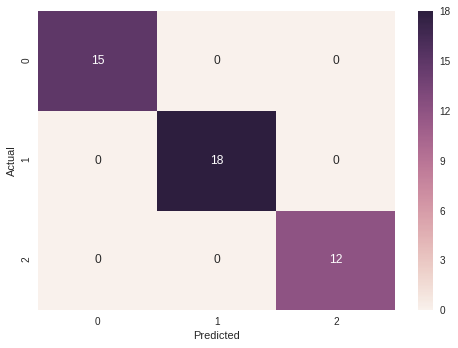

In [15]:
from sklearn.metrics import confusion_matrix


y_pred = tpot.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()#figsize=(10,10)
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [12]:
!ls

datalab


In [13]:
tpot

TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
        crossover_rate=0.1, cv=5, disable_update_check=False,
        early_stop=None, generations=1000000, max_eval_time_mins=5,
        max_time_mins=5, memory=None, mutation_rate=0.9, n_jobs=1,
        offspring_size=100, periodic_checkpoint_folder=None,
        population_size=100, random_state=None, scoring=None,
        subsample=1.0, verbosity=2, warm_start=False)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import datasets

In [0]:
#loading the dataset from sklearn
dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

#convert the data to pandas
X = pd.DataFrame(X, columns=dataset.feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [0]:
pipe_svc = Pipeline([("std", StandardScaler()), ("svc", SVC(random_state=1,))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'svc__C': param_range,'svc__kernel': ['linear']},
              {'svc__C': param_range, 'svc__gamma': param_range, 'svc__kernel': ['rbf']}]

In [0]:
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy',cv=10, return_train_score=True, n_jobs=-1)

gs = gs.fit(X, y)
print(gs.best_score_)
print(gs.best_params_)
gs.cv_results_

0.98
{'svc__C': 1.0, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


{'mean_fit_time': array([0.00497849, 0.00284591, 0.00411227, 0.00383983, 0.00235512,
        0.00235593, 0.0023613 , 0.00485072, 0.0050652 , 0.00572491,
        0.00340416, 0.00328853, 0.00483096, 0.00793889, 0.00353947,
        0.00322607, 0.00322447, 0.00476184, 0.00407224, 0.0033139 ,
        0.00330651, 0.00480731, 0.00358388, 0.00615954, 0.0041513 ,
        0.00333335, 0.0033922 , 0.00331376, 0.00573769, 0.00425243,
        0.00356483, 0.00327916, 0.00319641, 0.00331314, 0.00335178,
        0.0041831 , 0.00318496, 0.00348392, 0.00497713, 0.00634058,
        0.00471959, 0.00335028, 0.00265338, 0.00228641, 0.00270998,
        0.0042732 , 0.00413899, 0.00364106, 0.00332317, 0.00471435,
        0.00426323, 0.00278916, 0.00299225, 0.0042897 , 0.00426261,
        0.00390539, 0.00264075, 0.0029974 , 0.00219052, 0.00296052,
        0.00280228, 0.00425472, 0.00422676, 0.00371842, 0.00228219,
        0.00218527, 0.00210397, 0.00247486, 0.00263903, 0.00417442,
        0.00357337, 0.00247216]

In [0]:
#nested cross validation
gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid,scoring='accuracy',cv=2)

scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.967 +/- 0.042


In [0]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
scoring='accuracy', cv=2)

scores = cross_val_score(gs, X, y, scoring='accuracy', cv=5)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.967 +/- 0.030


In [0]:
gs = gs.fit(X, y)

In [0]:
gs.best_estimator_


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [0]:
gs.best_score_

0.9533333333333334

In [0]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
#standar los datos
X_std = pd.DataFrame(StandardScaler().fit_transform(X), columns=dataset.feature_names)
X_std.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.468455e-15,-1.657933e-15,-1.515825e-15,-8.052818e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


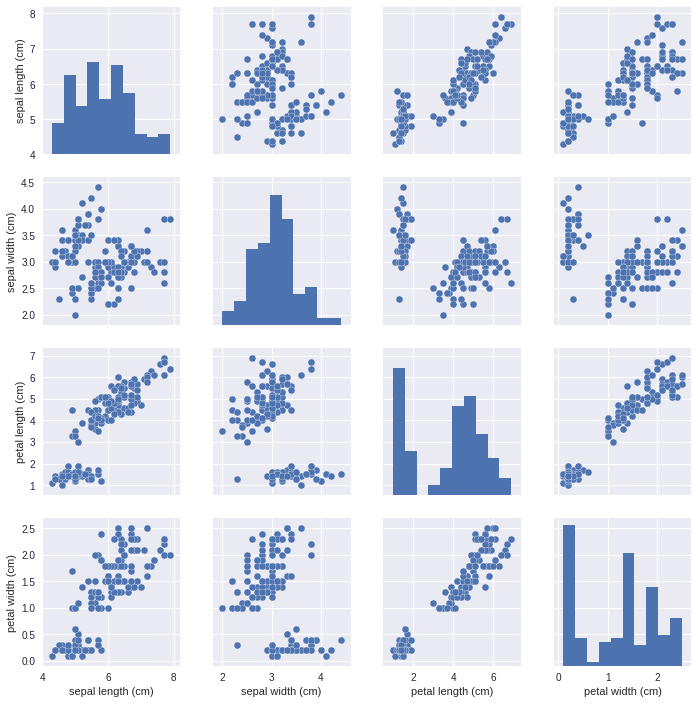

In [0]:
sns.pairplot(X)

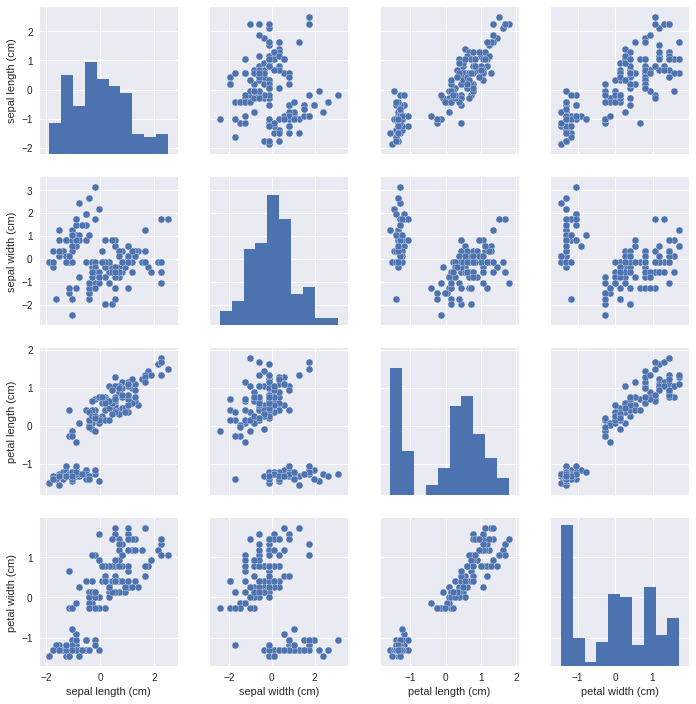

In [0]:
sns.pairplot(X_std)

In [0]:
# Returns the best model from a set of model families given
# training data using cross-validation.
def best_model(classifier_families, train_instances, judgements):
    best_quality = 0.0
    best_classifier = None
    classifiers = []
    for name, model, parameters in classifier_families:
        classifiers.append(best_config(name, model, parameters,
                                       train_instances,
                                       judgements))
 
    for name, quality, classifier in classifiers:
        #print('Considering classifier... ' + name)
        if (quality > best_quality):
            best_quality = quality
            best_classifier = [name, classifier]
 
    #print('Best classifier... ' + best_classifier[0])
    return best_classifier[1]
 
# List of candidate family classifiers with parameters for grid
# search [name, classifier object, parameters].
def candidate_families():
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.neighbors import KNeighborsClassifier
    
    candidates = []
    svm_tuned_parameters = [{'kernel': ['poly'],
                             'degree': [1, 2, 3, 4]}]
    candidates.append(["SVM", SVC(C=1), svm_tuned_parameters])
 
    rf_tuned_parameters = [{"n_estimators": [250, 500, 1000]}]
    candidates.append(["RandomForest",
                       RandomForestClassifier(n_jobs=-1),
                       rf_tuned_parameters])
 
    knn_tuned_parameters = [{"n_neighbors": [1, 3, 5, 10, 20]}]
    candidates.append(["kNN", KNeighborsClassifier(),
                       knn_tuned_parameters])
 
    return candidates


# Returns the best configuration for a model using crosvalidation
# and grid search
def best_config(name, model, parameters, train_instances, judgements):
    #print('Grid search for... ' + name)
    clf = GridSearchCV(model, parameters, cv=5,
                       scoring="accuracy", verbose=5, n_jobs=4)
    clf.fit(train_instances, judgements)
    best_estimator = clf.best_estimator_
    #print('Best hyperparameters: ' + str(clf.best_params_))
 
    return [str(clf.best_params_), clf.best_score_,
            best_estimator]

In [0]:
best_model(candidate_families(), X,y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] degree=1, kernel=poly ...........................................
[CV] degree=1, kernel=poly ...........................................
[CV] degree=1, kernel=poly ...........................................
[CV] degree=1, kernel=poly ...........................................
[CV] .. degree=1, kernel=poly, score=0.9666666666666667, total=   0.0s
[CV] ................. degree=1, kernel=poly, score=1.0, total=   0.0s
[CV] degree=1, kernel=poly ...........................................
[CV] .. degree=1, kernel=poly, score=0.9666666666666667, total=   0.0s
[CV] degree=2, kernel=poly ...........................................
[CV] ................. degree=1, kernel=poly, score=1.0, total=   0.0s
[CV] degree=2, kernel=poly ...........................................
[CV] .. degree=1, kernel=poly, score=0.9666666666666667, total=   0.0s
[CV] degree=2, kernel=poly ...........................................
[CV] ............

[Parallel(n_jobs=4)]: Done   8 out of  20 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.2s finished


Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=250 ................................................
[CV] n_estimators=250 ................................................
[CV] n_estimators=250 ................................................
[CV] n_estimators=250 ................................................
[CV] ....... n_estimators=250, score=0.9666666666666667, total=   0.8s
[CV] ....... n_estimators=250, score=0.9666666666666667, total=   0.9s
[CV] ....... n_estimators=250, score=0.9666666666666667, total=   0.8s
[CV] n_estimators=250 ................................................
[CV] n_estimators=500 ................................................
[CV] n_estimators=500 ................................................
[CV] ...................... n_estimators=250, score=0.9, total=   0.9s
[CV] n_estimators=500 ................................................
[CV] ...................... n_estimators=250, score=1.0, total=   1.0s
[CV] n_estimators

[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed:    8.7s remaining:    2.2s


[CV] ...... n_estimators=1000, score=0.9333333333333333, total=   5.6s
[CV] ...... n_estimators=1000, score=0.9333333333333333, total=   5.4s
[CV] ..................... n_estimators=1000, score=1.0, total=   4.1s


[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed:   12.8s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=1 ...................................................
[CV] .......... n_neighbors=1, score=0.9333333333333333, total=   0.0s
[CV] .......... n_neighbors=1, score=0.9333333333333333, total=   0.0s
[CV] .......... n_neighbors=1, score=0.9666666666666667, total=   0.0s
[CV] n_neighbors=1 ...................................................
[CV] n_neighbors=3 ...................................................
[CV] ......................... n_neighbors=1, score=1.0, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] .......... n_neighbors=1, score=0.9666666666666667, total=   0.0s
[CV] .......... n_neighbors=3, score=0.9666666666666667, total=   0.0s
[CV] .......... n

[Parallel(n_jobs=4)]: Done   6 out of  25 | elapsed:    0.1s remaining:    0.3s
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:    0.3s finished


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)